# Exploratory Data Analysis

In this notebook, we will perform exploratory data analysis (EDA) on the training dataset to understand the data better, visualize relationships between features, and identify any patterns or anomalies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset
df = pd.read_excel('../data/aks_02_data_mb.xlsx')
#test_data = pd.read_csv('../data/test.csv')

# Display the first few rows of the training data
df.head()

,key,namespace,pod,node,container,host_ip,pod_ip,uid,cpuUsage,memUsage,memUsageMB,cpuRequest,memRequest,memRequestMB,cpuLimit,memLimit,memLimitGB,Unnamed: 17
0,kube-system/ama-logs-f6skn,kube-system,ama-logs-f6skn,aks-amlnode12-65770209-vmss00000d,kube-state-metrics,10.57.138.10,10.57.138.100,0ff8ee9c-2587-4ab1-af64-b0b21f31c9e5,0.015320,225280,0.214844,0.075,235929600,225.0,0.5,1073741824,1024.0,NaN
1,kube-system/ama-logs-9ghkp,kube-system,ama-logs-9ghkp,aks-amlnode12-65770209-vmss000003,kube-state-metrics,10.57.138.120,10.57.138.123,dd077fbb-913e-4da9-a816-062fe4bf556c,0.012919,212992,0.203125,0.075,235929600,225.0,0.5,1073741824,1024.0,NaN
2,kube-system/ama-logs-6k8fs,kube-system,ama-logs-6k8fs,aks-amlnode12-65770209-vmss000008,kube-state-metrics,10.57.138.149,10.57.138.153,dabe6c14-027c-4df2-b9d7-b6ce1aadee09,0.011636,221184,0.210938,0.075,235929600,225.0,0.5,1073741824,1024.0,NaN
3,kube-system/ama-logs-r6ckz,kube-system,ama-logs-r6ckz,aks-spotpool-57402725-vmss00001i,kube-state-metrics,10.57.84.100,10.57.84.125,664ad516-13dc-4c89-83dc-1c68f6b8b3d5,0.009440,217088,0.207031,0.075,235929600,225.0,0.5,1073741824,1024.0,NaN
4,kube-system/ama-logs-26hnw,kube-system,ama-logs-26hnw,aks-fixedpool-14912270-vmss000009,kube-state-metrics,10.57.84.152,10.57.84.160,226ebbfa-2b8a-4429-abde-b36d9d31bdac,0.014263,217088,0.207031,0.075,235929600,225.0,0.5,1073741824,1024.0,NaN


In [2]:
df.describe()

,cpuUsage,memUsage,memUsageMB,cpuRequest,memRequest,memRequestMB,cpuLimit,memLimit,memLimitGB,Unnamed: 17
count,1247.000000,1.247000e+03,1247.000000,1247.000000,1.247000e+03,1247.000000,1247.000000,1.247000e+03,1247.000000,1.0
mean,0.105730,3.499534e+05,0.333742,0.083408,1.252916e+08,119.487410,0.794186,1.334093e+09,1272.290272,3.0
std,1.840404,2.112209e+06,2.014360,0.146857,1.950280e+08,185.993180,1.098788,2.686850e+09,2562.380006,NaN
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,3.0
25%,0.018421,2.211840e+05,0.210938,0.010000,2.097152e+07,20.000000,0.000000,1.048576e+08,100.000000,3.0
50%,0.037533,2.293760e+05,0.218750,0.100000,7.340032e+07,70.000000,0.500000,5.368709e+08,512.000000,3.0
75%,0.044652,2.334720e+05,0.222656,0.100000,1.073742e+08,102.400001,1.000000,1.073742e+09,1024.000000,3.0
max,53.006407,6.510592e+07,62.089844,1.000000,1.073742e+09,1024.000000,4.000000,1.717987e+10,16384.000000,3.0


In [3]:
df.dtypes

key              object
namespace        object
pod              object
node             object
container        object
host_ip          object
pod_ip           object
uid              object
cpuUsage        float64
memUsage          int64
memUsageMB      float64
cpuRequest      float64
memRequest        int64
memRequestMB    float64
cpuLimit        float64
memLimit          int64
memLimitGB      float64
Unnamed: 17     float64
dtype: object

In [4]:
df2=df[['cpuRequest','cpuUsage','memRequest','memUsage']]

In [5]:
df2.corr()

,cpuRequest,cpuUsage,memRequest,memUsage
cpuRequest,1.000000,0.111774,0.790865,0.106351
cpuUsage,0.111774,1.000000,0.192024,0.977679
memRequest,0.790865,0.192024,1.000000,0.200920
memUsage,0.106351,0.977679,0.200920,1.000000


In [6]:
df_pod_cpu=df[['cpuRequest','cpuUsage']]

In [7]:
df_pod_cpu.corr()

,cpuRequest,cpuUsage
cpuRequest,1.000000,0.111774
cpuUsage,0.111774,1.000000


<Axes: >

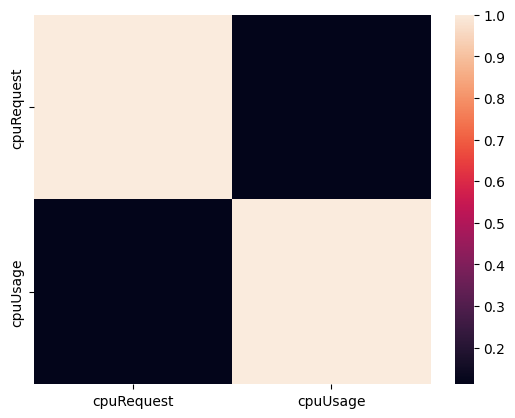

In [8]:
sns.heatmap(df_pod_cpu.corr())

In [9]:
from pycaret.regression import *
exp = setup(data=df, target='cpuRequest', session_id=123)

,Description,Value
0,Session id,123
1,Target,cpuRequest
2,Target type,Regression
3,Original data shape,"(1247, 18)"
4,Transformed data shape,"(1247, 41)"
5,Transformed train set shape,"(872, 41)"
6,Transformed test set shape,"(375, 41)"
7,Numeric features,9
8,Categorical features,8
9,Rows with missing values,99.9%


In [10]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0013,0.0001,0.0086,0.9944,0.0078,0.0248,0.2050
et,Extra Trees Regressor,0.0013,0.0001,0.0095,0.9926,0.0085,0.0252,0.2030
gbr,Gradient Boosting Regressor,0.0014,0.0001,0.0088,0.9917,0.0078,0.0280,0.2070
dt,Decision Tree Regressor,0.0015,0.0003,0.0110,0.9822,0.0098,0.0231,0.0870
ada,AdaBoost Regressor,0.0056,0.0003,0.0141,0.9808,0.0127,0.1378,0.1160
knn,K Neighbors Regressor,0.0042,0.0003,0.0154,0.9792,0.0137,0.1086,0.1050
lightgbm,Light Gradient Boosting Machine,0.0041,0.0007,0.0195,0.9715,0.0157,0.0556,0.1930
br,Bayesian Ridge,0.0096,0.0054,0.0369,0.6211,0.0195,0.2069,0.1750
huber,Huber Regressor,0.0547,0.0086,0.0921,0.5753,0.0702,0.8967,0.1370
lr,Linear Regression,0.0104,0.0061,0.0408,0.5658,0.0206,0.2155,1.0440
